In [1]:
import numpy as np
import pandas as pd
import random
import time
from IPython.display import clear_output

In [2]:
class Figure9:
    def __init__ (self, rows, cols, win_state, start_state):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            
            if (next == (1, 6)) or (next == (2, 6)) or (next == (3, 6)) or (next == (5, 2)) or (next == (5, 3)) or (next == (5, 4)) or (next == (5, 5)) or (next == (4, 9)) or (next == (4, 8)) or (next == (5, 8)) or (next == (6, 8)) or (next == (6, 5)) or (next == (7, 5)) or (next == (8, 5)) or (next == (9, 5)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += 0.1
                #reward -= 0.01
            else:
                reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((10, 10))
        # add barrier
        current_map[(1, 6)] = 5
        current_map[(2, 6)] = 5
        current_map[(3, 6)] = 5
        current_map[(4, 9)] = 5
        current_map[(4, 8)] = 5
        current_map[(5, 8)] = 5
        current_map[(6, 8)] = 5
        current_map[(5, 2)] = 5
        current_map[(5, 3)] = 5
        current_map[(5, 4)] = 5
        current_map[(5, 5)] = 5
        current_map[(6, 5)] = 5
        current_map[(7, 5)] = 5
        current_map[(8, 5)] = 5
        current_map[(9, 5)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [3]:
# will use Downing fig 12 for testing on this
class Figure12:
    def __init__ (self, rows, cols, win_state, start_state):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (2, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += 0.1
                #reward -= 0.01
            else:
                reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(2, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [4]:
# will use Downing fig 13 for testing on this
class Figure13:
    def __init__ (self, rows, cols, win_state, start_state):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (3, 3)) or (next == (3, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += 0.1
                #reward -= 0.01
            else:
                reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(3, 3)] = 5
        current_map[(3, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [5]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None   

    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    #valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]
    valid_learners = [lrnr for lrnr in team.learners]
    
    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars))
    
    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
#         print('------------------------')
#         print('action code: ' + str(top_learner.actionObj.actionCode))
#         print('Actions:')
#         print(actions)
#         print('------------------------')
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')

        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
    #print(action)
    return top_learner, action

In [6]:
def update (team, next_learner, action, learner, reward, alpha, discount):
    
    # find the greatest q value out of possible actions for learner t+1
    second_max_q = 0
    for second_learner in team.q_table:
        if second_learner['learner'] == str(next_learner.id):
            if second_learner['q'] > second_max_q:
                second_max_q = second_learner['q']
    
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 1 from tpg pdf
            first_learner['q'] += alpha * (reward + (discount * second_max_q) - first_learner['q'])

In [7]:
def evaluate_fitness (env_name, team, env, epsilon, alpha, discount):
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        total_reward += reward
        if isDone:
            return total_reward
        
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        if l_t.id != l_next.id:
            update(team, l_next, a_t, l_t, reward, alpha, discount)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return total_reward

In [8]:
# tpg imports
# import to do training
from tpg.trainer import Trainer
# import to run an agent (always needed)
from tpg.agent import Agent
# visual tools
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
# for writing
import csv
from datetime import date

In [9]:
# actions distribution tracker
# each index corresponds to its actions
# the values are the amount of times that action has been sampled
# action_counts = [0, 0, 0, 0]
# current_distribution = []

def action_distribution(counts):
    total = 0
    proportions = []
    for action in counts:
        proportion = 1 / action
        proportion = int(proportion * 10 * sum(counts))
        total += proportion
        proportions.append(proportion)
    
    return total, proportions  

# this function will sample actions in a way that is biased to the least sampled actions
def sample_action(total, proportions):
    
    sample = random.randint(1, total)
    
    if (sample > 1) and (sample <= proportions[0]):
        return 0
    elif (sample > proportions[0]) and (sample <= proportions[0] + proportions[1]):
        return 1
    elif (sample > proportions[0] + proportions[1]) and (sample <= proportions[0] + proportions[1] + proportions[2]):
        return 2
    else:
        return 3

In [10]:
# counts = [0, 0, 0, 0]
# dist_total, dist = action_distribution([1, 3, 4, 5])
# for i in range(100):
#     sample = sample_action(dist_total, dist)
#     if sample == 0:
#         counts[0] += 1
#     elif sample == 1:
#         counts[1] += 1
#     elif sample == 2:
#         counts[2] += 1
#     elif sample == 3:
#         counts[3] += 1
# print(counts)

In [11]:
# q table helper functions
def create (agents, gen):
    for agent in agents:
        team = agent.team
        for learner in team.learners:
            # randomize actions of the learners
            action_list = [0, 1, 2, 3]
            
            random.shuffle(action_list)
            actions = random.randint(1,4)
            for i in range(actions):
                (team.q_table).append({'learner': str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})
                action_counts[action_list[i]] += 1
    return action_counts
#         print('---------------------')
#         print(team.learners)
#         for entry in team.q_table:
#             print(entry)
#             print('-')
#         print('---------------------')

# add new learners upon evolution
def evolve (agents, lemarkian, gen, action_counts, action_dist_total, action_dist):
    if gen % 5 == 0:
        action_dist_total, action_dist = action_distribution(action_counts)
    
    for agent in agents:
        team = agent.team
        for learner in team.learners:   
            
            found = 0
            for entry in team.q_table:
                if entry['learner'] == str(learner.id):
                    found = 1
            
            if found == 0:
                parent_actions = []

                if team.parentTeam:
                    # grab the actions from the parent learner
                    parent_actions = [entry for entry in (team.parentTeam).q_table if entry['learner'] == str(learner.id) and entry['gen'] == gen-1] 

                if parent_actions:
                    for entry in parent_actions:
                        (team.q_table).append({'learner':str(learner.id), 'action':entry['action'], 'q':entry['q'], 'gen':gen, 'lemark':1})
                        # increment the sampled actions count
                        action_counts[entry['action']] += 1
                else:

                    # let the actions converge a bit before sampling
                    if (gen > 30):
                        # new way of sampling!
                        actions = random.randint(1,4)
                        action_list = []
                        for i in range(actions):
                            action_list.append(sample_action(action_dist_total, action_dist))
                    else:
                        action_list = [0, 1, 2, 3]
                        random.shuffle(action_list)
                        actions = random.randint(1,4)
                    
                    for i in range(actions):
                        (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lemark':0})
                        action_counts[entry['action']] += 1
    
    return action_counts, action_dist, action_dist_total


def clean (agents, current_gen):
    for agent in agents:
        team = agent.team
        for entry in team.q_table:
            if entry['gen'] < (current_gen):
                (team.q_table).remove(entry)

In [12]:
runs = 1
lemarkian = 1
save = 0

champs = [] # new

for run in range(runs):
    print(run)
    trainer = Trainer(actions=4, teamPopSize=50, pActAtom=1.0, 
                      nRegisters=4, initMaxActProgSize=48, 
                      initMaxTeamSize=2, maxTeamSize=5, gap=0.5) # initMaxTeamSize=2, maxTeamSize=5

    # init environment
#     envName = 'fig9'
#     env = Figure9(10, 10, (5, 9), (9, 3))
#     envName = 'fig11'
#     env = Figure11(5, 5, (0, 4), (4, 0))
    envName = 'fig12'
    env = Figure12(5, 5, (0, 4), (4, 0))
#     envName = 'fig13'
#     env = Figure13(5, 5, (2, 4), (4, 0))

    # init tracking tools
    allScores = []
    num_gen = 50
    champion = None
    best_score = -10000000

    # parameters
    alpha = 0.1
    epsilon = 0.1
    discount = 0.9

    # init samplers
    action_counts = [1, 1, 1, 1]
    action_dist = [0, 0, 0, 0]
    action_dist_total = 0

    for gen in range(num_gen):
        print(gen)
        best_score = -10000000 #new
        scoreList = []
        #print('gen' + str(gen))
        agents = trainer.getAgents()

        # update q table with new populations
        if gen == 0:
            actions_counts = create(agents, gen)
        else:
            # lemarkian learning set (set to 0 to turn off)
            action_counts, action_dist, action_dist_total = evolve(agents, lemarkian, gen, 
                                                                   action_counts, action_dist_total, action_dist)
            #clean(agents, gen)

        for agent in agents:  
            agent.zeroRegisters()
            team = agent.team
            env.reset()
            fitness = evaluate_fitness(envName, team, env, epsilon, alpha, discount)

            # save champion on last gen
            if gen == (num_gen - 1):
                if fitness > best_score:
                    best_score = fitness
                    print('Champ fitness: ' + str(fitness))
                    champion = team
            
            # new block
            # save champion for each run
            if fitness > best_score:
                best_score = fitness
                champ_team = team
                champ_learners = team.learners
#                 #print(team.learners)
#                 print(champ_learners)
                champ_agent = agent

            # apply scores
            agent.reward(fitness, envName)
            scoreList.append((agent.team.id, agent.team.outcomes))

        # evolution :)
        teams = trainer.applyScores(scoreList)
        trainer.evolve(tasks=[envName])

        # scores!
        scoreStats = trainer.fitnessStats
        allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average']))
        
        # new block
        # save champ for this generation
        champs.append({'fitness': fitness, 'team': champ_team, 'learners': champ_learners})
        champ_agent.saveToFile('champions/'+str(gen)+'.pk1')
        
    # collect average and max scores to save to csv
    if save == 1:
        averages = []
        maxes = []
        for score in allScores:
            averages.append(score[2])
            maxes.append(score[1])    

        df = pd.DataFrame({
            'average_score': averages,
            'max_score': maxes,
        })

        if lemarkian == 0:
            df.to_csv('../results/'+str(envName)+'/qtpg/'+str(run)+'.csv')
        else:
            df.to_csv('../results/'+str(envName)+'/lqtpg/'+str(run)+'.csv')

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Champ fitness: 101.82
Champ fitness: 103.22999999999999


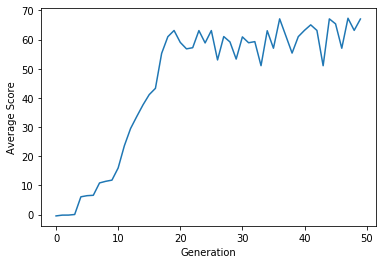

In [13]:
x = []
y = []
for i in range(num_gen):
    x.append(i)

for score in allScores:
    y.append(score[2])
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(x, y)
plt.show()

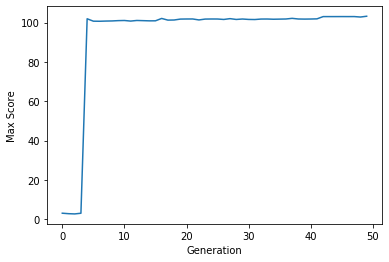

In [14]:
x = []
y = []
for i in range(num_gen):
    x.append(i)

for score in allScores:
    y.append(score[1])
plt.xlabel('Generation')
plt.ylabel('Max Score')
plt.plot(x, y)
plt.show()

## Diagnostics

In [15]:
# find all q values that correspond to given team
def find_team_q (q_table, team):
    result = []  
    for entry in q_table.q:
        if entry['team'] == str(team.id):
            result.append(entry)
    return result

# TODO better organize this for quicker analysis
def display_q (result):
    for entry in result:
        print(entry)

In [34]:
# run a given team after training
def post_training_run (env_name, team, epsilon, alpha, discount):
    env.reset()
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    states = []
    #print(states)
    states.append(env.current_state)    
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        states.append(s_next)
        total_reward += reward
        if isDone:
            return states, total_reward
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        print('State: ' + str(s_next) + ' Action: ' + str(a_next))
        if l_t.id != l_next.id:
            #print('Switching Learners!')
            #print('Learner: ' + str(l_next.id))
            update(team, l_next, a_t, l_t, reward, alpha, epsilon)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return states, total_reward

In [17]:
# run tests on champion
# display_q(champion.q_table)
# for learner in champion.learners:
#     print(learner.id)

In [22]:
%matplotlib notebook
%matplotlib notebook

In [35]:
from tpg.agent import loadAgent
def load_champion(agent_path):
    agent = loadAgent(agent_path)
    agent.configFunctionsSelf()
    print(agent.team)
    return agent.team

In [47]:
champ = load_champion('champions/37.pk1')
states, score = post_training_run(envName, champ, epsilon, alpha, discount)
print(score)
print(champ.q_table)

State: (3, 0) Action: 2
State: (3, 1) Action: 0
State: (3, 1) Action: 2
State: (3, 2) Action: 0
State: (2, 2) Action: 2
State: (2, 2) Action: 0
State: (1, 2) Action: 0
State: (0, 2) Action: 0
State: (0, 2) Action: 2
State: (0, 3) Action: 0
State: (0, 3) Action: 2
100.64
[{'learner': 'c697c5aa-b3e3-46e2-b63d-aecee5bf266a', 'action': 2, 'q': 0, 'gen': 37, 'lemark': 0}, {'learner': '09adb9dd-d9f4-45db-932a-2dfb1a2981a2', 'action': 3, 'q': -0.002846, 'gen': 37, 'lemark': 0}, {'learner': '09adb9dd-d9f4-45db-932a-2dfb1a2981a2', 'action': 0, 'q': 0.03916371950364729, 'gen': 37, 'lemark': 0}, {'learner': '51fae653-add5-4561-a897-1ade83ece7ff', 'action': 0, 'q': 0, 'gen': 37, 'lemark': 0}, {'learner': '51fae653-add5-4561-a897-1ade83ece7ff', 'action': 3, 'q': 0, 'gen': 37, 'lemark': 0}, {'learner': 'c249af7b-706a-48df-b23b-cebff478e92b', 'action': 2, 'q': 0.06222158153932706, 'gen': 37, 'lemark': 0}, {'learner': 'c249af7b-706a-48df-b23b-cebff478e92b', 'action': 0, 'q': 0.009230919660301009, 'gen

In [43]:
%matplotlib notebook
%matplotlib notebook

Traceback (most recent call last):
  File "/local/pkg/python/root-python-3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/local/pkg/python/root-python-3.7/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


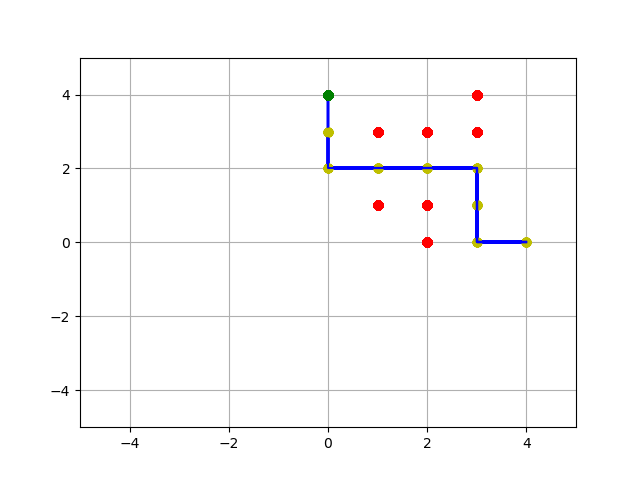

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
x = [0, 1, 2]
y = [0, 1, 2]

lines = plt.plot([], 'bo')
line = lines[0]

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def animate(frame):
    #line.set_data((0, 1), (states[frame][1], states[frame][0]))
#     obs_x = [1]
#     obs_y = [1]
#     plt.plot(obs_x, obs_y, 'ro')
    # obstacles
    obs_x = [2, 1, 2, 1, 2, 3, 3]
    obs_y = [0, 1, 1, 3, 3, 3, 4]
    # win state
    win_x = [0]
    win_y = [4]
    # the animated trajectory
    #plt.cla()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    traj_x = []
    traj_y = []
    for i in range(frame+1):
        traj_x.append(states[i][0])
        traj_y.append(states[i][1])
    # plot all of the points
    plt.plot(obs_x, obs_y, 'ro')
    plt.plot(win_x, win_y, 'go')
    plt.plot(traj_x, traj_y, 'b-')
    plt.plot(states[frame][0], states[frame][1], 'yo')
        
anim = FuncAnimation(fig, animate, frames = len(states), interval = 1000)
plt.grid(alpha=1)
plt.show()